Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [5]:
data = pd.read_csv("../content/drive/My Drive/ML_models/Logistic Regression/HR_Analytics_Data.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Analysing the data for relations between columns

In [0]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


picking the certain columns based on the relationship and ease of use

In [46]:
data1 = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary', 'left']]
data1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1


Converting Salary into numerical values using dummy variables

In [0]:
salary_dummies = pd.get_dummies(data1.salary, prefix="salary")

In [48]:
data2 = pd.concat([data1,salary_dummies],axis='columns')
data2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left,salary_high,salary_low,salary_medium
0,0.38,157,0,low,1,0,1,0
1,0.80,262,0,medium,1,0,0,1
2,0.11,272,0,medium,1,0,0,1
3,0.72,223,0,low,1,0,1,0
4,0.37,159,0,low,1,0,1,0


In [49]:
data2.drop('salary',axis='columns',inplace=True)
data2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_high,salary_low,salary_medium
0,0.38,157,0,1,0,1,0
1,0.80,262,0,1,0,0,1
2,0.11,272,0,1,0,0,1
3,0.72,223,0,1,0,1,0
4,0.37,159,0,1,0,1,0


In [0]:
y = data2['left']
data2.drop('left',axis='columns',inplace=True)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [81]:
model = LogisticRegression()
result = model.fit(X_train, y_train)
print('intercept', result.intercept_)
print('coefficients', result.coef_)

intercept [-0.00815586]
coefficients [[-3.75097426e+00  2.61377881e-03 -1.23323900e+00 -1.00905675e+00
   7.49578993e-01  2.66579986e-01]]


In [0]:
y_pred = model.predict(X_test)

### Few of the model metrics

In [83]:
model.score(X_test, y_test)

0.7788888888888889

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3236  226]
 [ 769  269]]


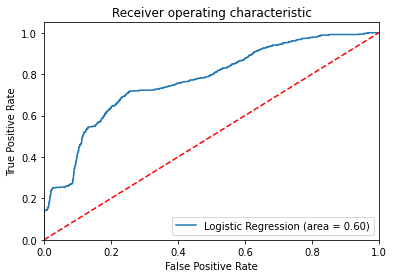

In [86]:
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()